# Smart Farming Crop Yield - Exploratory Data Analysis


## Table of Contents
1. [Data Loading & Overview](#1-data-loading--overview)
2. [Data Quality Assessment](#2-data-quality-assessment)
3. [Data Cleaning](#3-data-cleaning)
4. [Univariate Analysis](#4-univariate-analysis)
5. [Bivariate Analysis](#5-bivariate-analysis)
6. [Correlation Analysis](#6-correlation-analysis)
7. [Regional Analysis](#7-regional-analysis)
8. [Crop Type Analysis](#8-crop-type-analysis)
9. [Time-based Analysis](#9-time-based-analysis)
10. [Key Insights & Conclusions](#10-key-insights--conclusions)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## 1. Data Loading & Overview

In [2]:
# Load the dataset
df = pd.read_csv('../../data/Smart_Farming_Crop_Yield_2024.csv')

print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumns in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i:2}. {col}")

Dataset Shape: 500 rows × 22 columns

Columns in the dataset:
    1. farm_id
    2. region
    3. crop_type
    4. soil_moisture_%
    5. soil_pH
    6. temperature_C
    7. rainfall_mm
    8. humidity_%
    9. sunlight_hours
   10. irrigation_type
   11. fertilizer_type
   12. pesticide_usage_ml
   13. sowing_date
   14. harvest_date
   15. total_days
   16. yield_kg_per_hectare
   17. sensor_id
   18. timestamp
   19. latitude
   20. longitude
   21. NDVI_index
   22. crop_disease_status


In [5]:
df.head()

,farm_id,region,crop_type,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,irrigation_type,...,sowing_date,harvest_date,total_days,yield_kg_per_hectare,sensor_id,timestamp,latitude,longitude,NDVI_index,crop_disease_status
0,FARM0001,North India,Wheat,35.95,5.99,17.79,75.62,77.03,7.27,NaN,...,2024-01-08,2024-05-09,122,4408.07,SENS0001,2024-03-19,14.970941,82.997689,0.63,Mild
1,FARM0002,South USA,Soybean,19.74,7.24,30.18,89.91,61.13,5.67,Sprinkler,...,2024-02-04,2024-05-26,112,5389.98,SENS0002,2024-04-21,16.613022,70.869009,0.58,NaN
2,FARM0003,South USA,Wheat,29.32,7.16,27.37,265.43,68.87,8.23,Drip,...,2024-02-03,2024-06-26,144,2931.16,SENS0003,2024-02-28,19.503156,79.068206,0.80,Mild
3,FARM0004,Central USA,Maize,17.33,6.03,33.73,212.01,70.46,5.03,Sprinkler,...,2024-02-21,2024-07-04,134,4227.80,SENS0004,2024-05-14,31.071298,85.519998,0.44,NaN
4,FARM0005,Central USA,Cotton,19.37,5.92,33.86,269.09,55.73,7.93,NaN,...,2024-02-05,2024-05-20,105,4979.96,SENS0005,2024-04-13,16.568540,81.691720,0.84,Severe


In [6]:
# Data types and info
print("\nData Types:")
print(df.dtypes)
print("\n" + "="*50)
df.info()


Data Types:
farm_id                  object
region                   object
crop_type                object
soil_moisture_%         float64
soil_pH                 float64
temperature_C           float64
rainfall_mm             float64
humidity_%              float64
sunlight_hours          float64
irrigation_type          object
fertilizer_type          object
pesticide_usage_ml      float64
sowing_date              object
harvest_date             object
total_days                int64
yield_kg_per_hectare    float64
sensor_id                object
timestamp                object
latitude                float64
longitude               float64
NDVI_index              float64
crop_disease_status      object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   farm_id               500 non-null    object 
 1   regio

In [8]:
# Statistical summary for numerical columns
print("\nStatistical Summary:")
df.describe().round(2)


Statistical Summary:


,soil_moisture_%,soil_pH,temperature_C,rainfall_mm,humidity_%,sunlight_hours,pesticide_usage_ml,total_days,yield_kg_per_hectare,latitude,longitude,NDVI_index
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,26.75,6.52,24.68,181.69,65.19,7.03,26.59,119.50,4032.93,22.44,80.39,0.60
std,10.15,0.59,5.35,72.29,14.64,1.69,13.20,16.80,1174.43,7.28,5.91,0.18
min,10.16,5.51,15.00,50.17,40.23,4.01,5.05,90.00,2023.56,10.00,70.02,0.30
25%,17.89,6.03,20.30,119.22,51.86,5.67,14.94,105.75,2994.82,16.26,75.37,0.45
50%,25.86,6.53,24.66,191.54,65.68,7.00,25.98,119.00,4071.69,21.98,80.65,0.61
75%,36.02,7.04,29.09,239.04,77.99,8.47,38.01,134.00,5062.11,28.53,85.65,0.75
max,44.98,7.50,34.84,298.96,90.00,10.00,49.94,150.00,5998.29,34.98,89.99,0.90


In [10]:
# Statistical summary for categorical columns
print("\nCategorical Columns Summary:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    if col not in ['farm_id', 'sensor_id', 'sowing_date', 'harvest_date', 'timestamp']:
        print(f"\n")
        print(df[col].value_counts())


Categorical Columns Summary:


region
Central USA    109
East Africa    107
North India     99
South USA       94
South India     91
Name: count, dtype: int64


crop_type
Maize      111
Soybean    108
Cotton     107
Wheat       92
Rice        82
Name: count, dtype: int64


irrigation_type
Sprinkler    121
Manual       118
Drip         111
Name: count, dtype: int64


fertilizer_type
Inorganic    167
Mixed        167
Organic      166
Name: count, dtype: int64


crop_disease_status
Severe      133
Mild        125
Moderate    112
Name: count, dtype: int64


## 2. Data Quality Assessment

In [12]:
# Check for missing values
print("\nMissing Values Analysis:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0] if missing.sum() > 0 else "✅ No missing values found!")


Missing Values Analysis:
                     Missing Count  Missing %
irrigation_type                150       30.0
crop_disease_status            130       26.0


In [13]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")
if duplicates > 0:
    print("Duplicates detected! Consider removing them.")
else:
    print("No duplicate rows found!")


Duplicate Rows: 0
No duplicate rows found!


In [14]:
# Check unique values for key columns
print("\nUnique Values Count:")
print(f"   • Farms: {df['farm_id'].nunique()}")
print(f"   • Sensors: {df['sensor_id'].nunique()}")
print(f"   • Regions: {df['region'].nunique()}")
print(f"   • Crop Types: {df['crop_type'].nunique()}")
print(f"   • Irrigation Types: {df['irrigation_type'].nunique()}")
print(f"   • Fertilizer Types: {df['fertilizer_type'].nunique()}")
print(f"   • Disease Status: {df['crop_disease_status'].nunique()}")


Unique Values Count:
   • Farms: 500
   • Sensors: 500
   • Regions: 5
   • Crop Types: 5
   • Irrigation Types: 3
   • Fertilizer Types: 3
   • Disease Status: 3


## 3. Data Cleaning

The columns `irrigation_type` and `crop_disease_status` contain 'None' values which are valid categorical values (not missing data). We'll rename them for better clarity:
- `irrigation_type`: 'None' → 'No Irrigation'
- `crop_disease_status`: 'None' → 'No Disease'

In [20]:
print("Data Cleaning: Handling NaN values for clarity...")

# Before cleaning
print(f"\nBefore cleaning:")
print(f"   • irrigation_type NaN count: {df['irrigation_type'].isna().sum()}")
print(f"   • crop_disease_status NaN count: {df['crop_disease_status'].isna().sum()}")

# Replace NaN with descriptive values
df['irrigation_type'] = df['irrigation_type'].fillna('No Irrigation')
df['crop_disease_status'] = df['crop_disease_status'].fillna('No Disease')

# After cleaning
print(f"\nAfter cleaning:")
print(f"   • irrigation_type unique values: {df['irrigation_type'].unique().tolist()}")
print(f"   • crop_disease_status unique values: {df['crop_disease_status'].unique().tolist()}")

print("\nData cleaning completed!")

Data Cleaning: Handling NaN values for clarity...

Before cleaning:
   • irrigation_type NaN count: 150
   • crop_disease_status NaN count: 130

After cleaning:
   • irrigation_type unique values: ['No Irrigation', 'Sprinkler', 'Drip', 'Manual']
   • crop_disease_status unique values: ['Mild', 'No Disease', 'Severe', 'Moderate']

Data cleaning completed!


## 4. Univariate Analysis

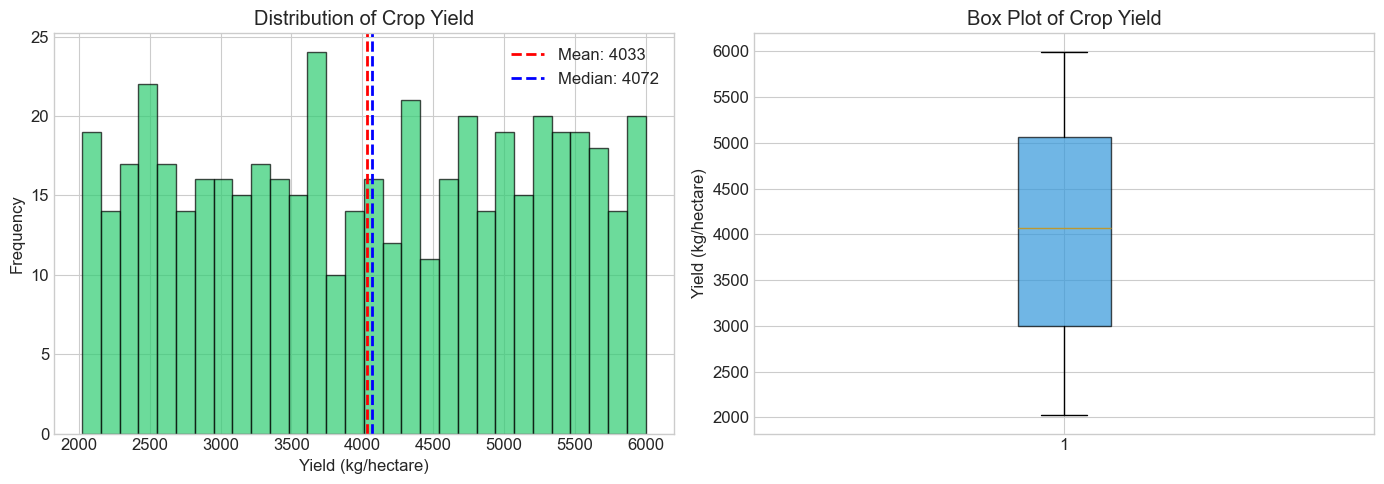


Yield Statistics:
   • Mean: 4032.93 kg/ha
   • Median: 4071.69 kg/ha
   • Std Dev: 1174.43 kg/ha
   • Min: 2023.56 kg/ha
   • Max: 5998.29 kg/ha


In [21]:
# Distribution of Yield (Target Variable)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['yield_kg_per_hectare'], bins=30, edgecolor='black', alpha=0.7, color='#2ecc71')
axes[0].axvline(df['yield_kg_per_hectare'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["yield_kg_per_hectare"].mean():.0f}')
axes[0].axvline(df['yield_kg_per_hectare'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df["yield_kg_per_hectare"].median():.0f}')
axes[0].set_xlabel('Yield (kg/hectare)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Crop Yield')
axes[0].legend()

# Box plot
axes[1].boxplot(df['yield_kg_per_hectare'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='#3498db', alpha=0.7))
axes[1].set_ylabel('Yield (kg/hectare)')
axes[1].set_title('Box Plot of Crop Yield')

plt.tight_layout()
plt.show()

print(f"\nYield Statistics:")
print(f"   • Mean: {df['yield_kg_per_hectare'].mean():.2f} kg/ha")
print(f"   • Median: {df['yield_kg_per_hectare'].median():.2f} kg/ha")
print(f"   • Std Dev: {df['yield_kg_per_hectare'].std():.2f} kg/ha")
print(f"   • Min: {df['yield_kg_per_hectare'].min():.2f} kg/ha")
print(f"   • Max: {df['yield_kg_per_hectare'].max():.2f} kg/ha")

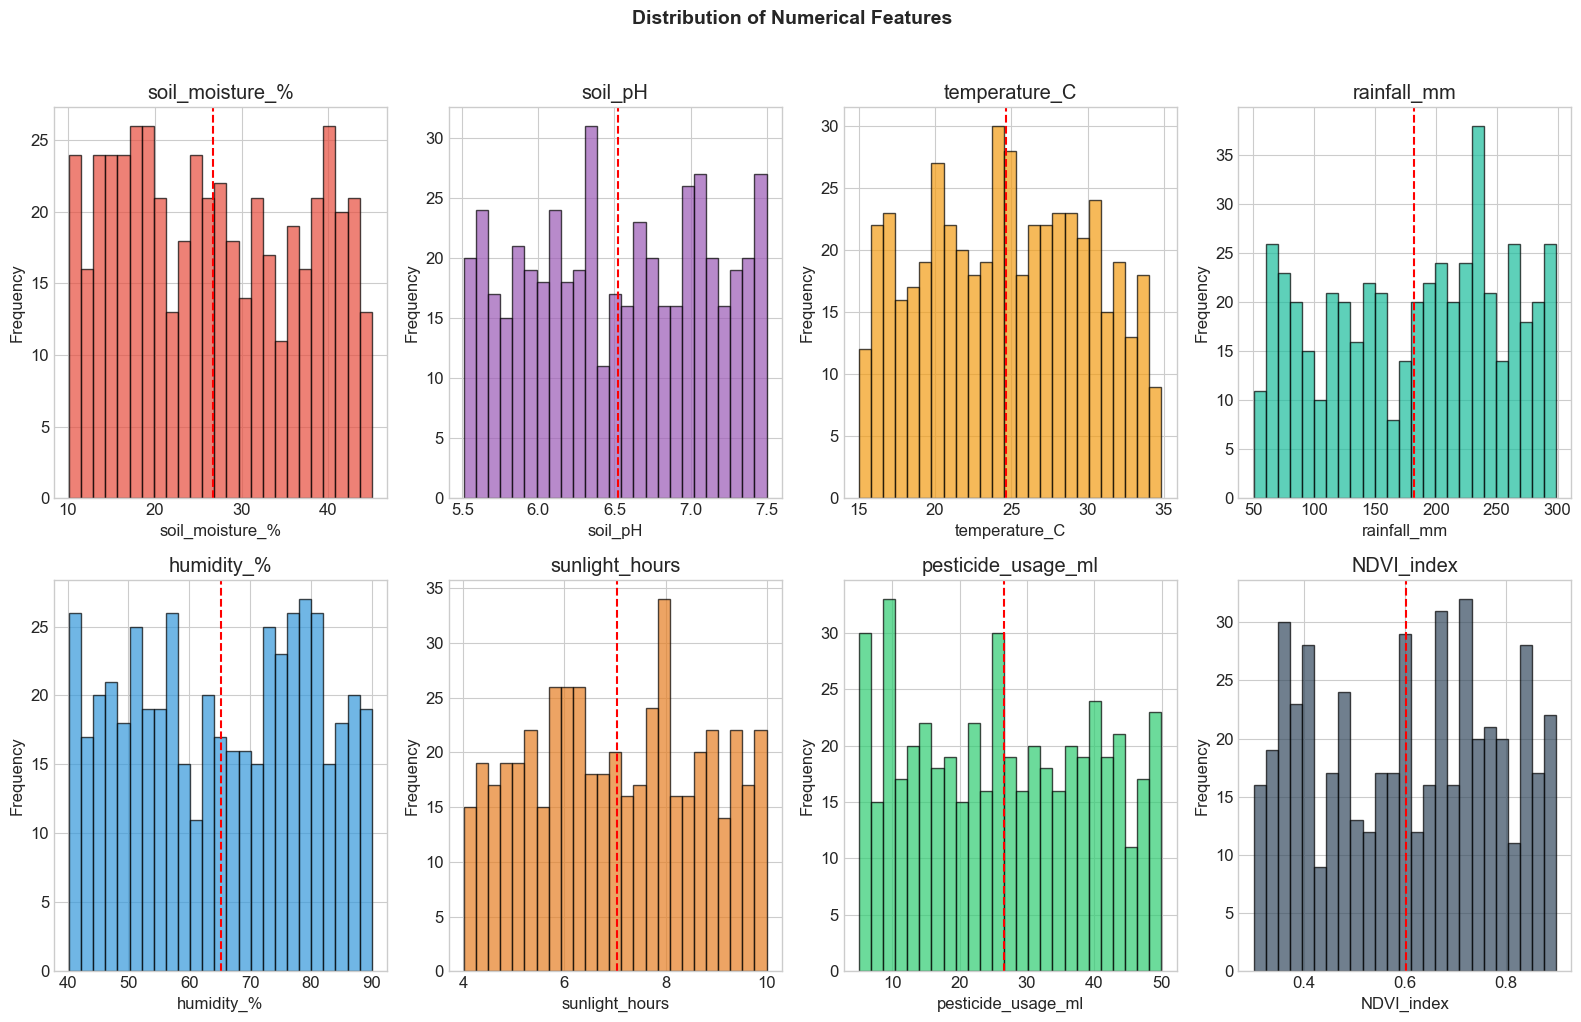

In [22]:
# Distribution of key numerical features
numerical_features = ['soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm', 
                      'humidity_%', 'sunlight_hours', 'pesticide_usage_ml', 'NDVI_index']

fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

colors = ['#e74c3c', '#9b59b6', '#f39c12', '#1abc9c', '#3498db', '#e67e22', '#2ecc71', '#34495e']

for i, (col, color) in enumerate(zip(numerical_features, colors)):
    axes[i].hist(df[col], bins=25, edgecolor='black', alpha=0.7, color=color)
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', linewidth=1.5)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.suptitle('Distribution of Numerical Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

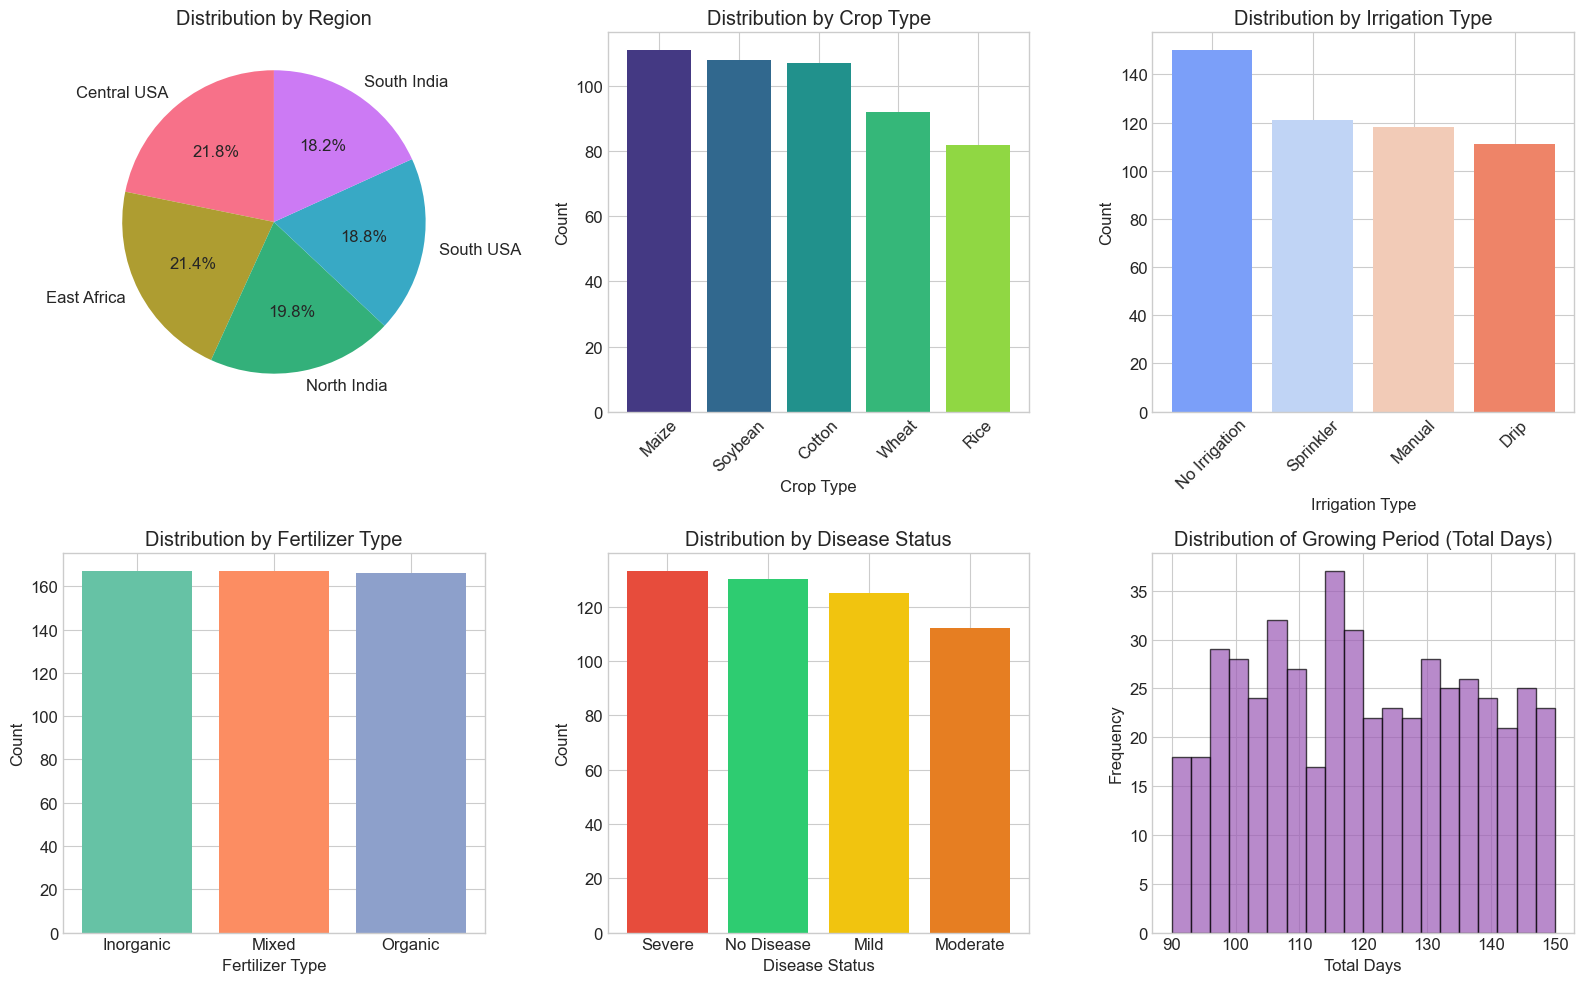

In [23]:
# Distribution of categorical features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Region distribution
region_counts = df['region'].value_counts()
axes[0, 0].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, 
               colors=sns.color_palette('husl', len(region_counts)))
axes[0, 0].set_title('Distribution by Region')

# Crop type distribution
crop_counts = df['crop_type'].value_counts()
axes[0, 1].bar(crop_counts.index, crop_counts.values, color=sns.color_palette('viridis', len(crop_counts)))
axes[0, 1].set_title('Distribution by Crop Type')
axes[0, 1].set_xlabel('Crop Type')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Irrigation type distribution
irrigation_counts = df['irrigation_type'].value_counts()
axes[0, 2].bar(irrigation_counts.index, irrigation_counts.values, color=sns.color_palette('coolwarm', len(irrigation_counts)))
axes[0, 2].set_title('Distribution by Irrigation Type')
axes[0, 2].set_xlabel('Irrigation Type')
axes[0, 2].set_ylabel('Count')
axes[0, 2].tick_params(axis='x', rotation=45)

# Fertilizer type distribution
fertilizer_counts = df['fertilizer_type'].value_counts()
axes[1, 0].bar(fertilizer_counts.index, fertilizer_counts.values, color=sns.color_palette('Set2', len(fertilizer_counts)))
axes[1, 0].set_title('Distribution by Fertilizer Type')
axes[1, 0].set_xlabel('Fertilizer Type')
axes[1, 0].set_ylabel('Count')

# Disease status distribution
disease_counts = df['crop_disease_status'].value_counts()
colors_disease = {'No Disease': '#2ecc71', 'Mild': '#f1c40f', 'Moderate': '#e67e22', 'Severe': '#e74c3c'}
axes[1, 1].bar(disease_counts.index, disease_counts.values, 
               color=[colors_disease.get(x, '#3498db') for x in disease_counts.index])
axes[1, 1].set_title('Distribution by Disease Status')
axes[1, 1].set_xlabel('Disease Status')
axes[1, 1].set_ylabel('Count')

# Total days distribution
axes[1, 2].hist(df['total_days'], bins=20, edgecolor='black', alpha=0.7, color='#9b59b6')
axes[1, 2].set_title('Distribution of Growing Period (Total Days)')
axes[1, 2].set_xlabel('Total Days')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 5. Bivariate Analysis

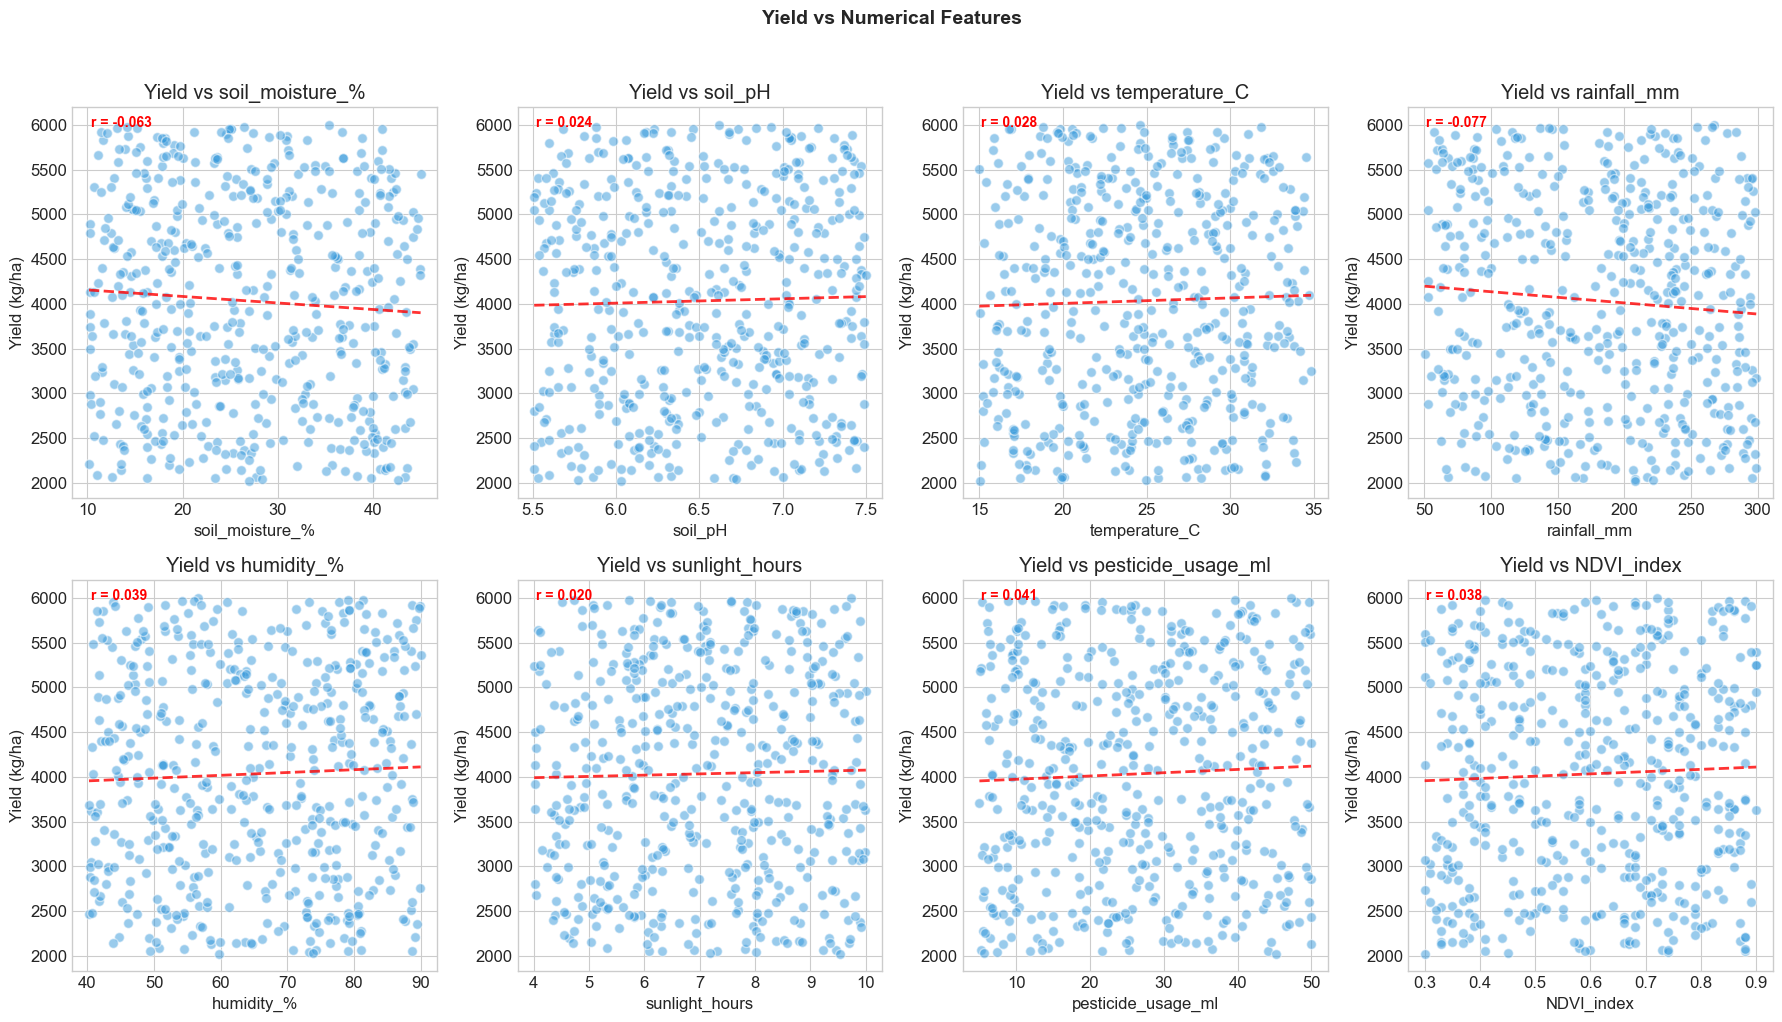

In [24]:
# Yield vs. Numerical Features
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    axes[i].scatter(df[col], df['yield_kg_per_hectare'], alpha=0.5, c='#3498db', edgecolors='white', s=50)
    
    # Add trend line
    z = np.polyfit(df[col], df['yield_kg_per_hectare'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[col].sort_values(), p(df[col].sort_values()), "r--", alpha=0.8, linewidth=2)
    
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Yield (kg/ha)')
    axes[i].set_title(f'Yield vs {col}')
    
    # Calculate correlation
    corr = df[col].corr(df['yield_kg_per_hectare'])
    axes[i].annotate(f'r = {corr:.3f}', xy=(0.05, 0.95), xycoords='axes fraction', 
                     fontsize=10, fontweight='bold', color='red')

plt.suptitle('Yield vs Numerical Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

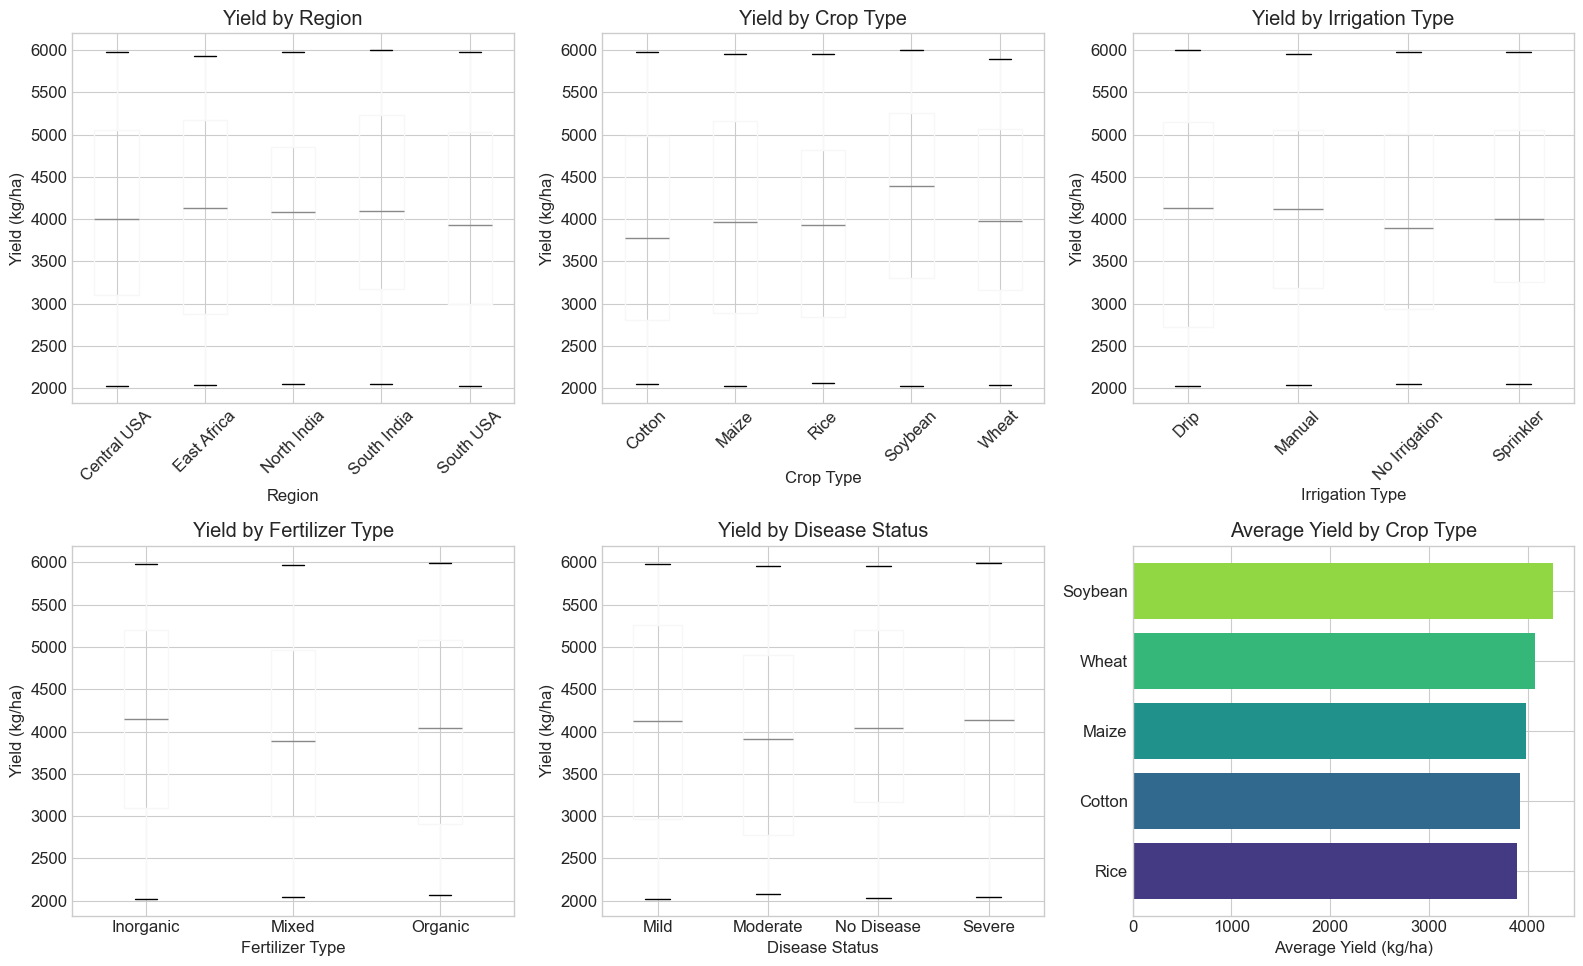

In [25]:
# Yield by Categorical Features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Yield by Region
df.boxplot(column='yield_kg_per_hectare', by='region', ax=axes[0, 0])
axes[0, 0].set_title('Yield by Region')
axes[0, 0].set_xlabel('Region')
axes[0, 0].set_ylabel('Yield (kg/ha)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Yield by Crop Type
df.boxplot(column='yield_kg_per_hectare', by='crop_type', ax=axes[0, 1])
axes[0, 1].set_title('Yield by Crop Type')
axes[0, 1].set_xlabel('Crop Type')
axes[0, 1].set_ylabel('Yield (kg/ha)')
axes[0, 1].tick_params(axis='x', rotation=45)

# Yield by Irrigation Type
df.boxplot(column='yield_kg_per_hectare', by='irrigation_type', ax=axes[0, 2])
axes[0, 2].set_title('Yield by Irrigation Type')
axes[0, 2].set_xlabel('Irrigation Type')
axes[0, 2].set_ylabel('Yield (kg/ha)')
axes[0, 2].tick_params(axis='x', rotation=45)

# Yield by Fertilizer Type
df.boxplot(column='yield_kg_per_hectare', by='fertilizer_type', ax=axes[1, 0])
axes[1, 0].set_title('Yield by Fertilizer Type')
axes[1, 0].set_xlabel('Fertilizer Type')
axes[1, 0].set_ylabel('Yield (kg/ha)')

# Yield by Disease Status
order = ['No Disease', 'Mild', 'Moderate', 'Severe']
df.boxplot(column='yield_kg_per_hectare', by='crop_disease_status', ax=axes[1, 1])
axes[1, 1].set_title('Yield by Disease Status')
axes[1, 1].set_xlabel('Disease Status')
axes[1, 1].set_ylabel('Yield (kg/ha)')

# Average Yield Comparison
avg_yield_by_crop = df.groupby('crop_type')['yield_kg_per_hectare'].mean().sort_values(ascending=True)
axes[1, 2].barh(avg_yield_by_crop.index, avg_yield_by_crop.values, color=sns.color_palette('viridis', len(avg_yield_by_crop)))
axes[1, 2].set_xlabel('Average Yield (kg/ha)')
axes[1, 2].set_title('Average Yield by Crop Type')

plt.suptitle('')  # Remove automatic suptitle from boxplot
plt.tight_layout()
plt.show()

In [26]:
# Summary statistics by category
print("\nAverage Yield by Region:")
print(df.groupby('region')['yield_kg_per_hectare'].agg(['mean', 'std', 'min', 'max']).round(2))

print("\nAverage Yield by Crop Type:")
print(df.groupby('crop_type')['yield_kg_per_hectare'].agg(['mean', 'std', 'min', 'max']).round(2))

print("\nAverage Yield by Disease Status:")
print(df.groupby('crop_disease_status')['yield_kg_per_hectare'].agg(['mean', 'std', 'min', 'max']).round(2))


Average Yield by Region:
                mean      std      min      max
region                                         
Central USA  4013.08  1163.27  2023.56  5970.39
East Africa  4053.18  1227.15  2043.13  5924.44
North India  3996.22  1150.72  2050.61  5978.14
South India  4122.88  1163.30  2049.06  5998.29
South USA    3984.45  1181.20  2029.16  5980.83

Average Yield by Crop Type:
              mean      std      min      max
crop_type                                    
Cotton     3925.60  1201.32  2046.41  5980.83
Maize      3982.55  1212.37  2023.56  5953.33
Rice       3896.18  1150.33  2066.90  5952.62
Soybean    4256.81  1156.36  2029.16  5998.29
Wheat      4077.58  1122.70  2043.13  5893.78

Average Yield by Disease Status:
                        mean      std      min      max
crop_disease_status                                    
Mild                 4089.87  1216.38  2023.56  5980.83
Moderate             3915.92  1140.95  2077.58  5957.61
No Disease           4082.65 

## 6. Correlation Analysis

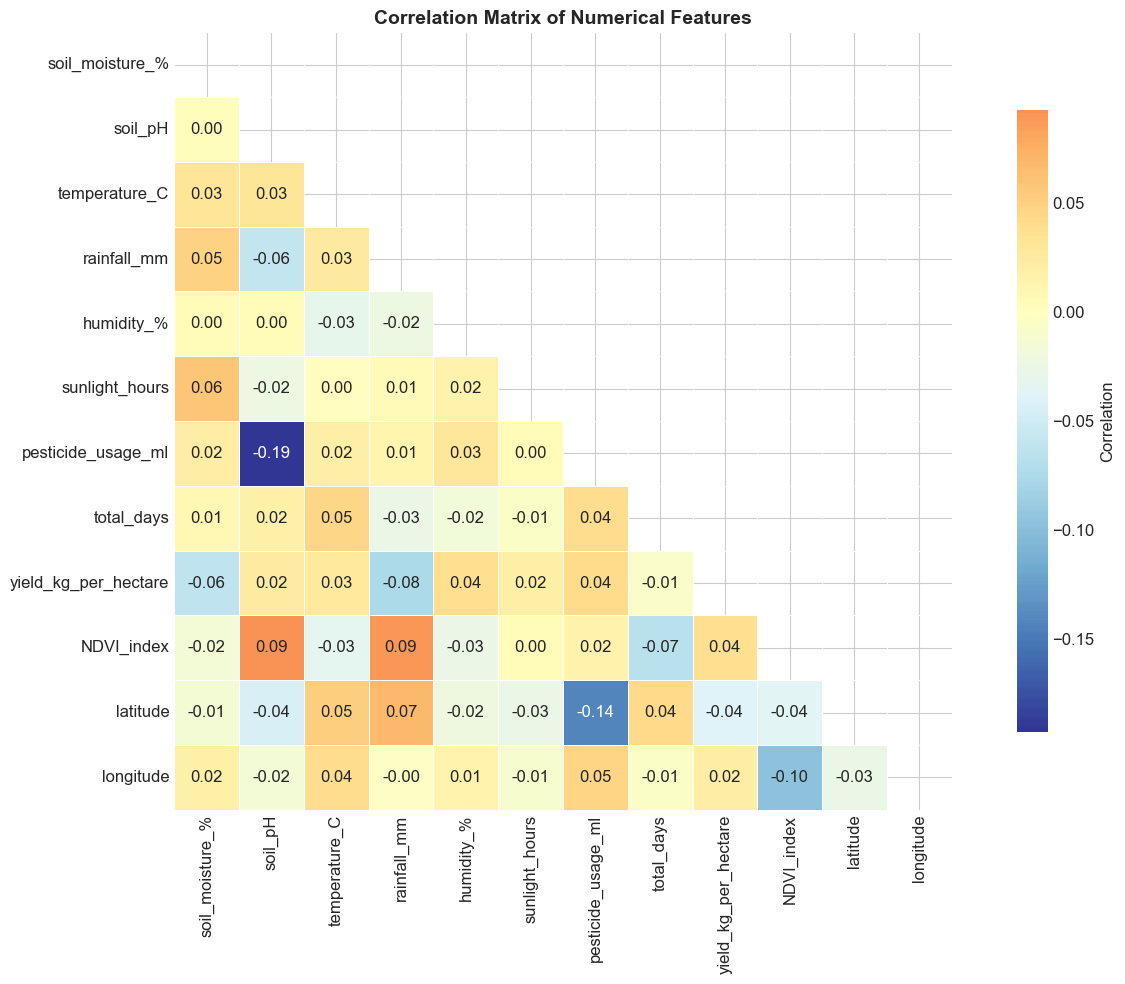

In [27]:
# Correlation matrix for numerical features
numerical_cols = ['soil_moisture_%', 'soil_pH', 'temperature_C', 'rainfall_mm', 
                  'humidity_%', 'sunlight_hours', 'pesticide_usage_ml', 'total_days',
                  'yield_kg_per_hectare', 'NDVI_index', 'latitude', 'longitude']

corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, fmt='.2f', 
            cbar_kws={'shrink': 0.8, 'label': 'Correlation'})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


Correlation with Yield (sorted by absolute value):
   • rainfall_mm: -0.077 ↓ (Weak)
   • soil_moisture_%: -0.063 ↓ (Weak)
   • pesticide_usage_ml: +0.041 ↑ (Weak)
   • humidity_%: +0.039 ↑ (Weak)
   • latitude: -0.038 ↓ (Weak)
   • NDVI_index: +0.038 ↑ (Weak)
   • temperature_C: +0.028 ↑ (Weak)
   • soil_pH: +0.024 ↑ (Weak)
   • longitude: +0.022 ↑ (Weak)
   • sunlight_hours: +0.020 ↑ (Weak)
   • total_days: -0.008 ↓ (Weak)


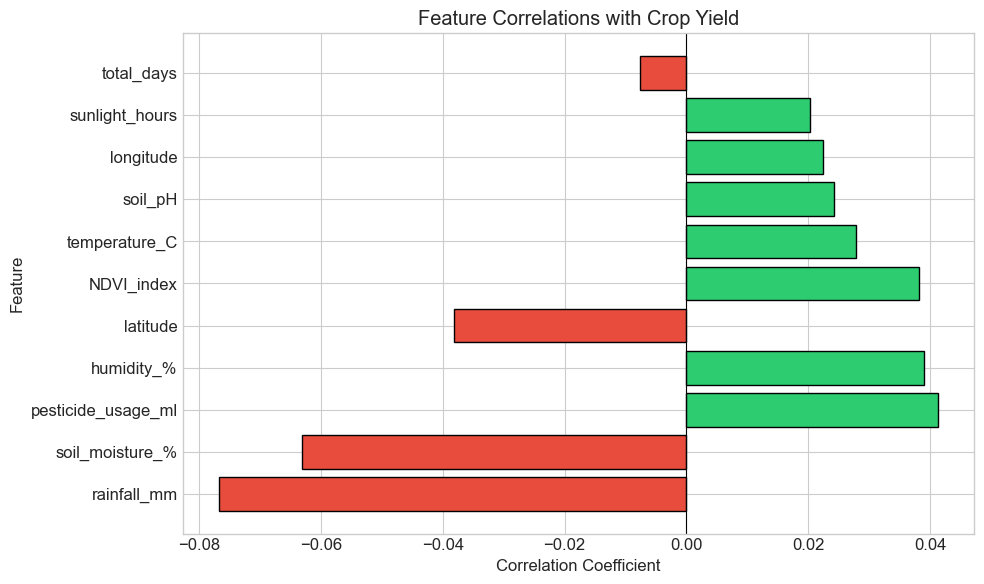

In [28]:
# Top correlations with Yield
yield_correlations = corr_matrix['yield_kg_per_hectare'].drop('yield_kg_per_hectare').sort_values(key=abs, ascending=False)

print("\nCorrelation with Yield (sorted by absolute value):")
for feature, corr in yield_correlations.items():
    direction = "↑" if corr > 0 else "↓"
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    print(f"   • {feature}: {corr:+.3f} {direction} ({strength})")

# Bar chart of correlations
plt.figure(figsize=(10, 6))
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in yield_correlations.values]
plt.barh(yield_correlations.index, yield_correlations.values, color=colors, edgecolor='black')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.title('Feature Correlations with Crop Yield')
plt.tight_layout()
plt.show()

## 7. Regional Analysis

In [30]:
# Detailed regional analysis
regional_stats = df.groupby('region').agg({
    'yield_kg_per_hectare': ['mean', 'std', 'count'],
    'temperature_C': 'mean',
    'rainfall_mm': 'mean',
    'humidity_%': 'mean',
    'soil_moisture_%': 'mean',
    'NDVI_index': 'mean'
}).round(2)

regional_stats.columns = ['Avg Yield', 'Yield Std', 'Farm Count', 'Avg Temp (°C)', 
                          'Avg Rainfall (mm)', 'Avg Humidity (%)', 'Avg Soil Moisture (%)', 'Avg NDVI']

print("\nRegional Statistics:")
regional_stats


Regional Statistics:


,Avg Yield,Yield Std,Farm Count,Avg Temp (°C),Avg Rainfall (mm),Avg Humidity (%),Avg Soil Moisture (%),Avg NDVI
region,,,,,,,,
Central USA,4013.08,1163.27,109,25.34,177.81,64.66,26.62,0.61
East Africa,4053.18,1227.15,107,24.62,184.43,65.76,26.25,0.61
North India,3996.22,1150.72,99,24.76,188.25,64.18,25.51,0.61
South India,4122.88,1163.30,91,24.24,186.52,65.49,29.01,0.61
South USA,3984.45,1181.20,94,24.31,171.46,65.95,26.58,0.57


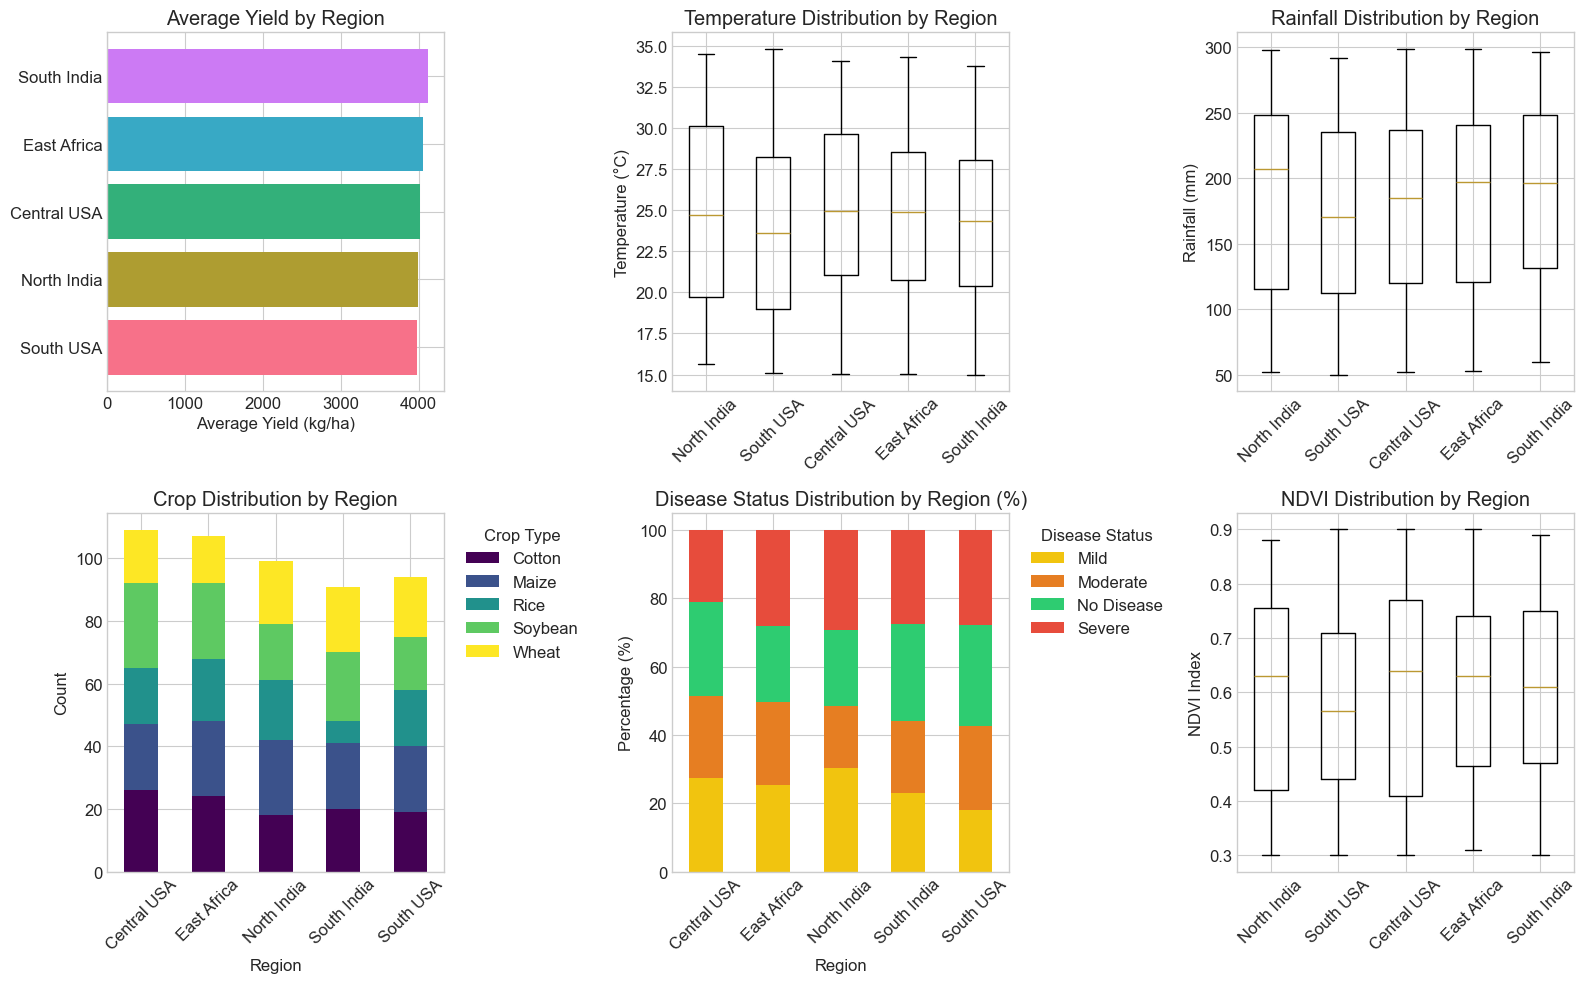

In [31]:
# Regional comparison visualization
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

regions = df['region'].unique()
colors = sns.color_palette('husl', len(regions))

# Average yield by region
avg_yield = df.groupby('region')['yield_kg_per_hectare'].mean().sort_values(ascending=True)
axes[0, 0].barh(avg_yield.index, avg_yield.values, color=colors)
axes[0, 0].set_xlabel('Average Yield (kg/ha)')
axes[0, 0].set_title('Average Yield by Region')

# Temperature by region
axes[0, 1].boxplot([df[df['region']==r]['temperature_C'] for r in regions], labels=regions)
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_title('Temperature Distribution by Region')
axes[0, 1].tick_params(axis='x', rotation=45)

# Rainfall by region
axes[0, 2].boxplot([df[df['region']==r]['rainfall_mm'] for r in regions], labels=regions)
axes[0, 2].set_ylabel('Rainfall (mm)')
axes[0, 2].set_title('Rainfall Distribution by Region')
axes[0, 2].tick_params(axis='x', rotation=45)

# Crop distribution by region
crop_region = pd.crosstab(df['region'], df['crop_type'])
crop_region.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='viridis')
axes[1, 0].set_xlabel('Region')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Crop Distribution by Region')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Crop Type', bbox_to_anchor=(1.02, 1), loc='upper left')

# Disease status by region
disease_region = pd.crosstab(df['region'], df['crop_disease_status'])
disease_region_pct = disease_region.div(disease_region.sum(axis=1), axis=0) * 100
disease_region_pct.plot(kind='bar', stacked=True, ax=axes[1, 1], 
                        color=['#f1c40f', '#e67e22', '#2ecc71', '#e74c3c'])
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Percentage (%)')
axes[1, 1].set_title('Disease Status Distribution by Region (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Disease Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# NDVI by region
axes[1, 2].boxplot([df[df['region']==r]['NDVI_index'] for r in regions], labels=regions)
axes[1, 2].set_ylabel('NDVI Index')
axes[1, 2].set_title('NDVI Distribution by Region')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Crop Type Analysis

In [33]:
# Detailed crop analysis
crop_stats = df.groupby('crop_type').agg({
    'yield_kg_per_hectare': ['mean', 'std', 'count'],
    'total_days': 'mean',
    'temperature_C': 'mean',
    'rainfall_mm': 'mean',
    'soil_moisture_%': 'mean',
    'soil_pH': 'mean',
    'NDVI_index': 'mean'
}).round(2)

crop_stats.columns = ['Avg Yield', 'Yield Std', 'Count', 'Avg Growing Days', 
                      'Avg Temp', 'Avg Rainfall', 'Avg Soil Moisture', 'Avg pH', 'Avg NDVI']

print("\nCrop Type Statistics:")
crop_stats


Crop Type Statistics:


,Avg Yield,Yield Std,Count,Avg Growing Days,Avg Temp,Avg Rainfall,Avg Soil Moisture,Avg pH,Avg NDVI
crop_type,,,,,,,,,
Cotton,3925.60,1201.32,107,120.85,24.63,190.08,26.53,6.54,0.58
Maize,3982.55,1212.37,111,118.10,24.63,177.01,26.58,6.52,0.61
Rice,3896.18,1150.33,82,116.70,24.63,173.64,27.44,6.49,0.62
Soybean,4256.81,1156.36,108,120.97,24.66,187.42,28.34,6.52,0.62
Wheat,4077.58,1122.70,92,120.37,24.84,178.01,24.73,6.55,0.59


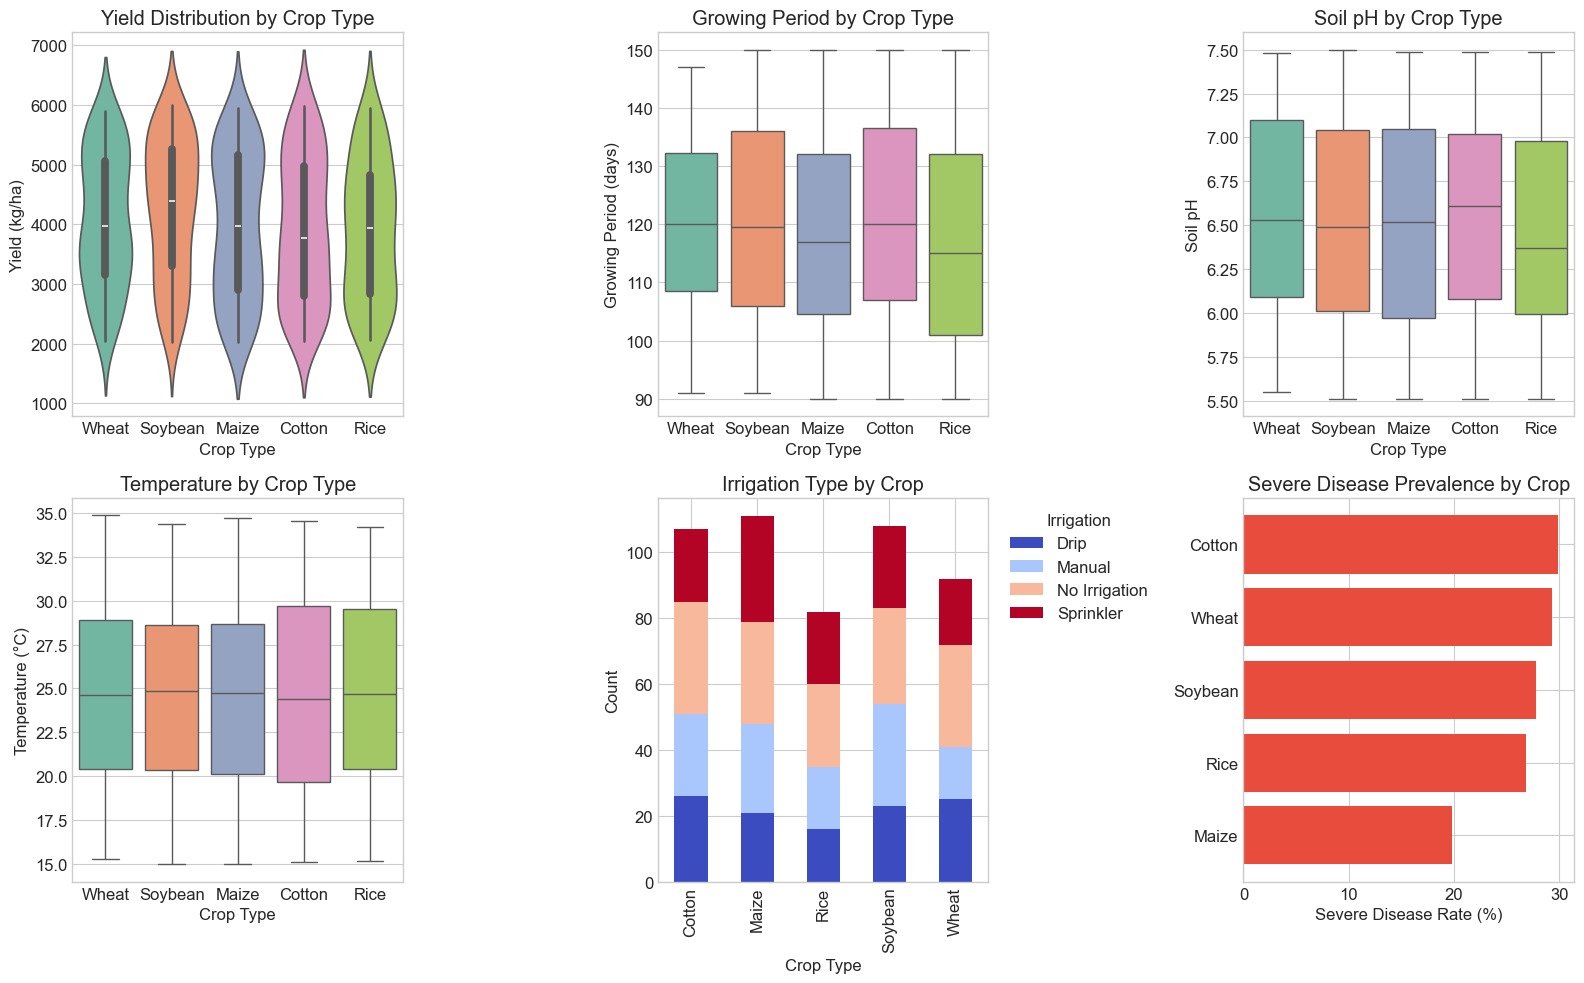

In [34]:
# Crop type comparison
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

crops = df['crop_type'].unique()
crop_colors = sns.color_palette('Set2', len(crops))

# Yield by crop type (violin plot)
sns.violinplot(data=df, x='crop_type', y='yield_kg_per_hectare', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_xlabel('Crop Type')
axes[0, 0].set_ylabel('Yield (kg/ha)')
axes[0, 0].set_title('Yield Distribution by Crop Type')

# Growing period by crop
sns.boxplot(data=df, x='crop_type', y='total_days', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_xlabel('Crop Type')
axes[0, 1].set_ylabel('Growing Period (days)')
axes[0, 1].set_title('Growing Period by Crop Type')

# Soil pH preference by crop
sns.boxplot(data=df, x='crop_type', y='soil_pH', ax=axes[0, 2], palette='Set2')
axes[0, 2].set_xlabel('Crop Type')
axes[0, 2].set_ylabel('Soil pH')
axes[0, 2].set_title('Soil pH by Crop Type')

# Temperature requirements by crop
sns.boxplot(data=df, x='crop_type', y='temperature_C', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_xlabel('Crop Type')
axes[1, 0].set_ylabel('Temperature (°C)')
axes[1, 0].set_title('Temperature by Crop Type')

# Irrigation type distribution by crop
irrigation_crop = pd.crosstab(df['crop_type'], df['irrigation_type'])
irrigation_crop.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='coolwarm')
axes[1, 1].set_xlabel('Crop Type')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Irrigation Type by Crop')
axes[1, 1].legend(title='Irrigation', bbox_to_anchor=(1.02, 1), loc='upper left')

# Disease prevalence by crop
severe_disease = df[df['crop_disease_status'] == 'Severe'].groupby('crop_type').size()
total_by_crop = df.groupby('crop_type').size()
severe_pct = (severe_disease / total_by_crop * 100).sort_values(ascending=True)
axes[1, 2].barh(severe_pct.index, severe_pct.values, color='#e74c3c')
axes[1, 2].set_xlabel('Severe Disease Rate (%)')
axes[1, 2].set_title('Severe Disease Prevalence by Crop')

plt.tight_layout()
plt.show()

## 9. Time-based Analysis

In [35]:
# Convert date columns to datetime
df['sowing_date'] = pd.to_datetime(df['sowing_date'])
df['harvest_date'] = pd.to_datetime(df['harvest_date'])
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract month information
df['sowing_month'] = df['sowing_date'].dt.month
df['harvest_month'] = df['harvest_date'].dt.month

print(f"Date Range:")
print(f"   • Sowing: {df['sowing_date'].min().strftime('%Y-%m-%d')} to {df['sowing_date'].max().strftime('%Y-%m-%d')}")
print(f"   • Harvest: {df['harvest_date'].min().strftime('%Y-%m-%d')} to {df['harvest_date'].max().strftime('%Y-%m-%d')}")

Date Range:
   • Sowing: 2024-01-01 to 2024-03-28
   • Harvest: 2024-04-09 to 2024-08-17


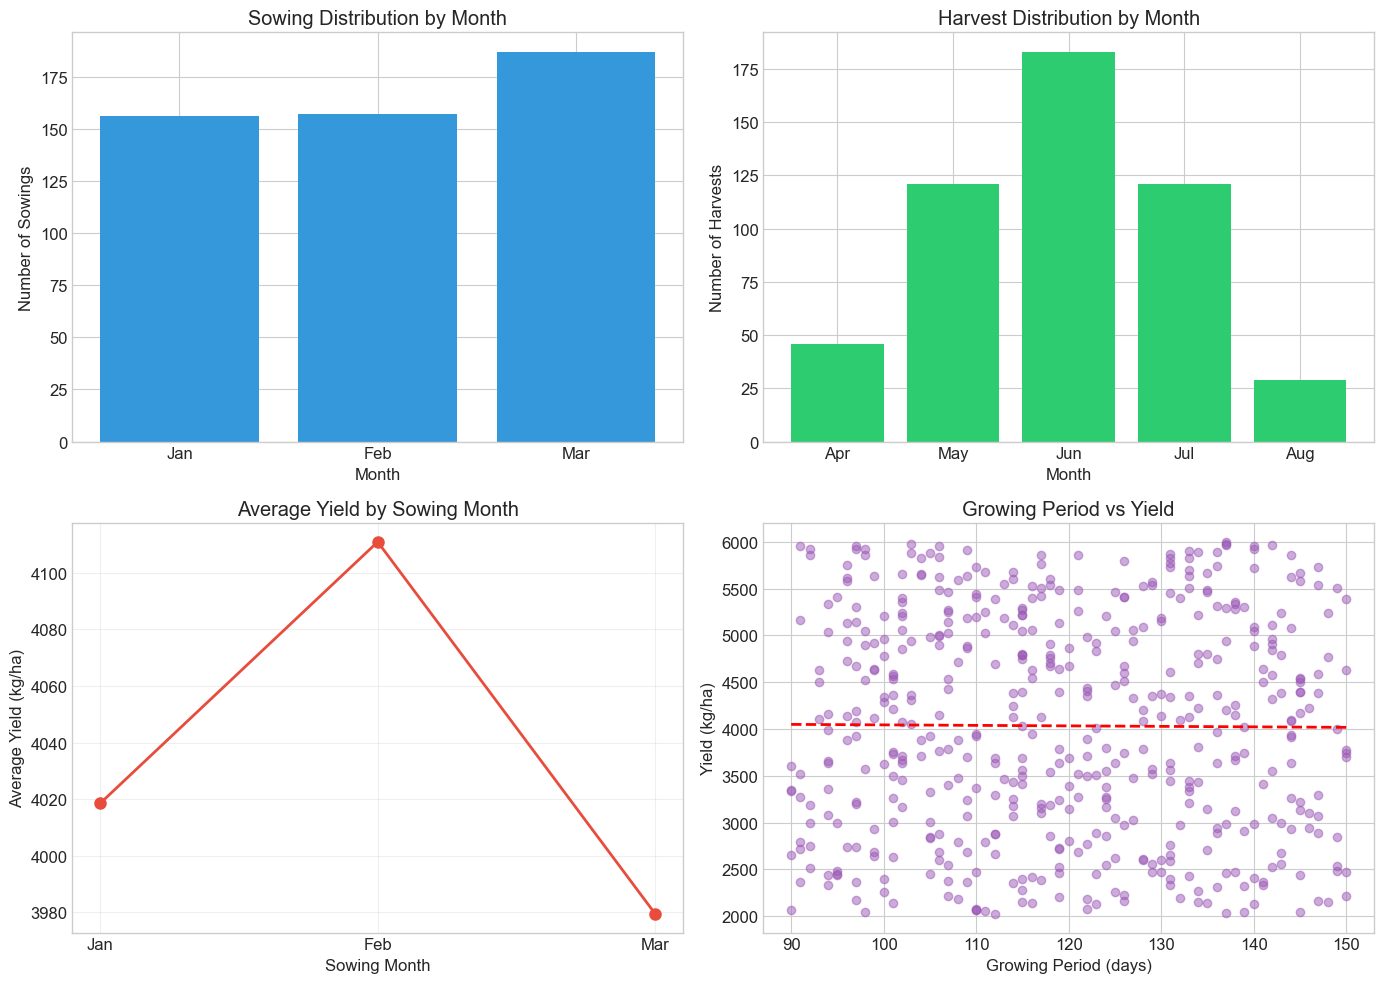

In [36]:
# Time-based visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sowing month distribution
sowing_counts = df['sowing_month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0, 0].bar([month_names[m-1] for m in sowing_counts.index], sowing_counts.values, color='#3498db')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Number of Sowings')
axes[0, 0].set_title('Sowing Distribution by Month')

# Harvest month distribution
harvest_counts = df['harvest_month'].value_counts().sort_index()
axes[0, 1].bar([month_names[m-1] for m in harvest_counts.index], harvest_counts.values, color='#2ecc71')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Number of Harvests')
axes[0, 1].set_title('Harvest Distribution by Month')

# Average yield by sowing month
yield_by_sowing = df.groupby('sowing_month')['yield_kg_per_hectare'].mean()
axes[1, 0].plot([month_names[m-1] for m in yield_by_sowing.index], yield_by_sowing.values, 
                marker='o', linewidth=2, color='#e74c3c', markersize=8)
axes[1, 0].set_xlabel('Sowing Month')
axes[1, 0].set_ylabel('Average Yield (kg/ha)')
axes[1, 0].set_title('Average Yield by Sowing Month')
axes[1, 0].grid(True, alpha=0.3)

# Growing period vs yield
axes[1, 1].scatter(df['total_days'], df['yield_kg_per_hectare'], alpha=0.5, c='#9b59b6')
axes[1, 1].set_xlabel('Growing Period (days)')
axes[1, 1].set_ylabel('Yield (kg/ha)')
axes[1, 1].set_title('Growing Period vs Yield')

# Add trend line
z = np.polyfit(df['total_days'], df['yield_kg_per_hectare'], 1)
p = np.poly1d(z)
axes[1, 1].plot(df['total_days'].sort_values(), p(df['total_days'].sort_values()), "r--", linewidth=2)

plt.tight_layout()
plt.show()

## 10. Key Insights & Conclusions

In [38]:
# Summary of key findings
print("="*70)
print("                    EDA KEY INSIGHTS SUMMARY                      ")
print("="*70)

print("\n DATASET OVERVIEW:")
print(f"   • Total Records: {len(df)} farms")
print(f"   • Features: {len(df.columns)} columns")
print(f"   • No missing values or duplicates detected")

print("\n DATA CLEANING PERFORMED:")
print("   • irrigation_type: 'None' → 'No Irrigation'")
print("   • crop_disease_status: 'None' → 'No Disease'")

print("\n YIELD STATISTICS:")
print(f"   • Average Yield: {df['yield_kg_per_hectare'].mean():.0f} kg/ha")
print(f"   • Range: {df['yield_kg_per_hectare'].min():.0f} - {df['yield_kg_per_hectare'].max():.0f} kg/ha")

print("\n REGIONAL INSIGHTS:")
best_region = df.groupby('region')['yield_kg_per_hectare'].mean().idxmax()
best_region_yield = df.groupby('region')['yield_kg_per_hectare'].mean().max()
print(f"   • Best Performing Region: {best_region} ({best_region_yield:.0f} kg/ha)")

print("\n CROP INSIGHTS:")
best_crop = df.groupby('crop_type')['yield_kg_per_hectare'].mean().idxmax()
best_crop_yield = df.groupby('crop_type')['yield_kg_per_hectare'].mean().max()
print(f"   • Highest Yielding Crop: {best_crop} ({best_crop_yield:.0f} kg/ha average)")

print("\n DISEASE IMPACT:")
healthy_yield = df[df['crop_disease_status'] == 'No Disease']['yield_kg_per_hectare'].mean()
severe_yield = df[df['crop_disease_status'] == 'Severe']['yield_kg_per_hectare'].mean()
yield_loss = ((healthy_yield - severe_yield) / healthy_yield) * 100
print(f"   • Healthy Crops Avg Yield: {healthy_yield:.0f} kg/ha")
print(f"   • Severely Diseased Avg Yield: {severe_yield:.0f} kg/ha")
print(f"   • Yield Loss from Severe Disease: {yield_loss:.1f}%")

print("\n KEY CORRELATIONS WITH YIELD:")
top_correlations = yield_correlations.head(3)
for feature, corr in top_correlations.items():
    print(f"   • {feature}: r = {corr:+.3f}")


print("\n" + "="*70)

                    EDA KEY INSIGHTS SUMMARY                      

 DATASET OVERVIEW:
   • Total Records: 500 farms
   • Features: 24 columns
   • No missing values or duplicates detected

 DATA CLEANING PERFORMED:
   • irrigation_type: 'None' → 'No Irrigation'
   • crop_disease_status: 'None' → 'No Disease'

 YIELD STATISTICS:
   • Average Yield: 4033 kg/ha
   • Range: 2024 - 5998 kg/ha

 REGIONAL INSIGHTS:
   • Best Performing Region: South India (4123 kg/ha)

 CROP INSIGHTS:
   • Highest Yielding Crop: Soybean (4257 kg/ha average)

 DISEASE IMPACT:
   • Healthy Crops Avg Yield: 4083 kg/ha
   • Severely Diseased Avg Yield: 4029 kg/ha
   • Yield Loss from Severe Disease: 1.3%

 KEY CORRELATIONS WITH YIELD:
   • rainfall_mm: r = -0.077
   • soil_moisture_%: r = -0.063
   • pesticide_usage_ml: r = +0.041



In [39]:
# Save processed dataset to CSV
import os

output_path = os.path.abspath(os.path.join('..', '..', 'data', 'Smart_farming_post_processing.csv'))
df.to_csv(output_path, index=False)
print(f"Saved processed dataset to: {output_path}")
print(f"   Rows: {len(df)}, Columns: {len(df.columns)}")


Saved processed dataset to: c:\Users\abdelali\Desktop\UEMF\cours 3eme année\Data_mining\projet_final\data\Smart_farming_post_processing.csv
   Rows: 500, Columns: 24
